In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

paths = Path.cwd() / "data"
paths = list(paths.glob("*.*"))

In [2]:
df = pd.read_csv(paths[3], dtype={"DAY_OF_WEEK":"category","ACTIVITY_NAME":"category"}, parse_dates=[0]) 
df

,ACTIVITY_DATE,DAY_OF_WEEK,ACTIVITY_HOUR,ACTIVITY_NO,CUSTOMER_NUMBER,ACTIVITY_NAME
0,2019-01-22,Tue,20,2,630178,MB_INTEREST_RATE_VIEW
1,2019-01-10,Thu,18,16,630178,MB_INTEREST_RATE_VIEW
2,2019-01-26,Sat,17,15,630178,MB_INTEREST_RATE_VIEW
3,2019-01-02,Wed,9,27,630178,MB_INTEREST_RATE_VIEW
4,2019-01-19,Sat,8,3,630178,MB_INTEREST_RATE_VIEW
...,...,...,...,...,...,...
16132670,2019-11-01,Fri,11,1,327258,TRANSFER_VIB_ACCOUNT_BULK
16132671,2019-12-02,Mon,15,1,327258,TRANSFER_VIB_ACCOUNT_BULK
16132672,2019-11-19,Tue,17,1,882344,TRANSFER_VIB_ACCOUNT_BULK
16132673,2019-11-13,Wed,10,5,199908,RB_BILLPAY_PSTN


In [27]:
df_count = df[["ACTIVITY_DATE", "CUSTOMER_NUMBER", "ACTIVITY_NO"]].groupby(["CUSTOMER_NUMBER","ACTIVITY_DATE"]).count()
df_count

ACTIVITY_NO
CUSTOMER_NUMBER ACTIVITY_DATE             
0               2019-09-26               7
                2019-10-03               5
                2019-10-11               4
                2019-10-12               2
                2019-10-14               4
...                                    ...
999982          2019-12-26               3
999996          2019-10-21               5
                2019-11-01               4
                2019-11-30               4
                2019-12-31               9

[2212374 rows x 1 columns]

In [3]:
activities_each_day = df[["ACTIVITY_DATE", "CUSTOMER_NUMBER"]].groupby(["ACTIVITY_DATE"]).nunique()
activities_each_day

,CUSTOMER_NUMBER
ACTIVITY_DATE,
2019-01-01,2
2019-01-02,75
2019-01-03,120
2019-01-04,155
2019-01-05,108
...,...
2019-12-27,15588
2019-12-28,13575
2019-12-29,11257


<AxesSubplot:xlabel='ACTIVITY_DATE'>

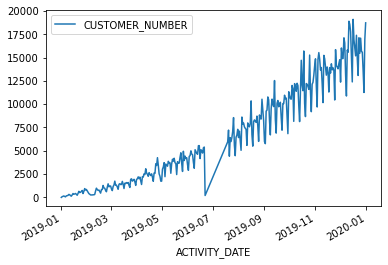

In [8]:
activities_each_day.plot(style="-")

Database had problems from 22/6 to 18/7. Records missing on 22/6 and then stopped coming for the whole period.
Cross examine with MyVIB transaction shows that people still using the service during that period.
Furthermore, the trend after suggests the blackout might not be experienced by the users, otherwise we would see major drop off and return to normal behaviour (instead of continuing as is).
Need to take MyVIB Transaction into account

In [5]:
activities_each_day.to_csv("activities.csv")

In [39]:
df_count.index.to_frame().groupby(level=0).diff()

CUSTOMER_NUMBER ACTIVITY_DATE
CUSTOMER_NUMBER ACTIVITY_DATE                               
0               2019-09-26                 NaN           NaT
                2019-10-03                 0.0        7 days
                2019-10-11                 0.0        8 days
                2019-10-12                 0.0        1 days
                2019-10-14                 0.0        2 days
...                                        ...           ...
999982          2019-12-26                 0.0        1 days
999996          2019-10-21                 NaN           NaT
                2019-11-01                 0.0       11 days
                2019-11-30                 0.0       29 days
                2019-12-31                 0.0       31 days

[2212374 rows x 2 columns]

In [6]:
df[df["ACTIVITY_DATE"] == "2019-06-22"]

,ACTIVITY_DATE,DAY_OF_WEEK,ACTIVITY_HOUR,ACTIVITY_NO,CUSTOMER_NUMBER,ACTIVITY_NAME
5262,2019-06-22,Sat,1,2,453888,MB_INTEREST_RATE_VIEW
5440,2019-06-22,Sat,0,1,56920,MB_INTEREST_RATE_VIEW
11474,2019-06-22,Sat,1,2,96146,MB_INTEREST_RATE_VIEW
20532,2019-06-22,Sat,2,2,751738,MB_INTEREST_RATE_VIEW
29192,2019-06-22,Sat,0,3,548463,MB_INTEREST_RATE_VIEW
...,...,...,...,...,...,...
16082601,2019-06-22,Sat,1,4,813161,MB_CHANGE_PIN
16088384,2019-06-22,Sat,1,2,419888,TRANSFER_VIA_SML_ACCOUNT
16109618,2019-06-22,Sat,0,9,509963,QUERY_CURRENT_ACCOUNT
16114757,2019-06-22,Sat,1,1,135801,MB_EXCHANGE_RATE_VIEW
